1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Matrix multiplication between a (n,k) and (k,m) results in a (n,m) matrix. Each entity in the resultant matrix is obtained row-column multiplication involving a total of k multiplications and k-1 additions respectively. The total entities in the resultant matrix are $(n*m)$. So we need to perform a total of $k*(n*m)$ multiplications and $(k-1)*(n*m)$ addtions respectively.

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [23]:
import time
import numpy as np
A = np.random.random((5,3))
B = np.random.random((3,5))

def matmul_list_of_lists(A,B):
    result=[[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j]+= A[i][k]*B[k][j]
    return result
start_time=time.time()
result_list_of_lists=matmul_list_of_lists(A, B)
end_time=time.time()
list_of_lists_time=end_time-start_time
print("Matrix multiyplication using list of lists result:")
for row in result_list_of_lists:
    print(row)
print(f"Time taken using list of lists: {list_of_lists_time:.6f} seconds")

A_np=np.array(A)
B_np=np.array(B)
start_time=time.time()
result_numpy=np.dot(A_np,B_np)
end_time=time.time()
numpy_time=end_time-start_time
print("\nMatrix multiplication using NumPy result:")
print(result_numpy)
print(f"Time taken using NumPy: {numpy_time:.6f} seconds")

if list_of_lists_time<numpy_time:
    print("\nList of lists implementation is faster.")
else:
    print("\nNumPy implementation is faster.")

Matrix multiyplication using list of lists result:
[0.7628215274985779, 0.3512515259007425, 0.4773960109791849, 0.8202404333095622, 0.35778218285225094]
[0.6035491767731984, 0.158819734507943, 0.27604025413027217, 0.33580964923546436, 0.15611981972178654]
[0.7420616917157745, 0.3315538173945193, 0.321807636307299, 0.6462050273533462, 0.4433093688601412]
[0.7377760507877433, 0.5448684996014759, 0.47963994229061113, 1.1859771468568712, 0.689255760000955]
[0.5020494931145286, 0.42953037511711745, 0.4878934768214734, 1.0654968863607213, 0.44348996819909203]
Time taken using list of lists: 0.001000 seconds

Matrix multiplication using NumPy result:
[[0.76282153 0.35125153 0.47739601 0.82024043 0.35778218]
 [0.60354918 0.15881973 0.27604025 0.33580965 0.15611982]
 [0.74206169 0.33155382 0.32180764 0.64620503 0.44330937]
 [0.73777605 0.5448685  0.47963994 1.18597715 0.68925576]
 [0.50204949 0.42953038 0.48789348 1.06549689 0.44348997]]
Time taken using NumPy: 0.000000 seconds

NumPy implement

The NumPy implementation is  faster due to its optimized C-based backend and efficient memory handling, while the list of lists implementation is done in pure Python and is less optimized.

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

This method similar bubble sort method involves repeted scanning for hihest element it has to check the condition $n-1$ times for 2nd highest it has to go $(n-1)+(n-2)$ and for total sorting it takes $(n-1)+(n-2)+.....+1=n*(n-1)/2$ which is Order of O($n^2$)the time complexity for the median of array is of the order($n^2$)

In [75]:
import numpy as np
import time
def find_kth_largest(arr,k):
    for i in range(k):
        max_idx=0
        for j in range(1,len(arr)-i):
            if arr[j]>arr[max_idx]:
                max_idx=j
        arr[max_idx],arr[len(arr)-i-1]=arr[len(arr)-i-1],arr[max_idx]
    return arr[len(arr)-i-1]
def median(arr):
    n=len(arr)
    if n%2==1:
        return find_kth_largest(arr.copy(),n//2+1)
    else:
        mid1=find_kth_largest(arr.copy(),n//2)
        mid2=find_kth_largest(arr.copy(),n//2+1)
        return (mid1+mid2)/2

def partition(arr,low,high):
    pivot=arr[high]
    i=low
    for j in range(low,high):
        if arr[j]<pivot:
            arr[i],arr[j]=arr[j],arr[i]
            i+=1
    arr[i],arr[high]=arr[high],arr[i]
    return i
def quickselect(arr,low,high,k):
    if low==high:
        return arr[low]
    pivot_index=partition(arr,low,high) 
    if k==pivot_index:
        return arr[k]
    elif k<pivot_index:
        return quickselect(arr,low,pivot_index-1,k)
    else:
        return quickselect(arr,pivot_index+1,high,k)
def median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr.copy(), 0, n - 1, n // 2)
    else:
        mid1=quickselect(arr.copy(),0,n-1,n//2-1)
        mid2=quickselect(arr.copy(),0,n-1,n//2)
        return (mid1+mid2)/2

start=time.time()
median(Array.copy())
median_time=time.time()-start

start=time.time()
median_quickselect(Array.copy())
quickselect_time=time.time()-start

start=time.time()
np.median(Array.copy())
numpy_time=time.time()-start

Array=np.random.random((2000))
print(f"median by given method:{median(Array.copy())}")
print(f"median by quickselect method:{median_quickselect(Array.copy())}")
print(f"median by numpy method:{np.median(Array.copy())}")
median_time, quickselect_time, numpy_time

median by given method:0.5082464542842253
median by quickselect method:0.5082464542842253
median by numpy method:0.5082464542842253


(0.0, 0.0010001659393310547, 0.0)

4. What is the gradient of the following function with respect to x and y?    
    $x^2y+y^3sinx$  

$∂f/∂x=2xy+y^3cosx$   
$∂f/∂y=x^2+3y^2sinx$  
$∇f=(∂f/∂x,∂f/∂y)=(2xy+y^3cosx,x^2+3y^2sinx)$  
It can be also represented in vector form $(2xy+y^3cosx)i+(x^2+3y^2sinx)j$

7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [130]:
{
    "student_info": {
        "1.2022": {
            "1.Branch 1": {
                "1.Roll Number": 1,
                "Name": "N",
                "marks": {
                    "1.Maths": 100,
                    "English": 70
                }
            },
            "2.Branch 2": None
        },
        "2.2023": {
            "1.Branch 1": None,
            "2.Branch 2": None
        },
        "3.2024": {
            "1.Branch 1": None,
            "2.Branch 2": None
        },
        "4.2025": {
            "1.Branch 1": None,
            "2.Branch 2": None
        }
    }
}

{'student_info': {'1.2022': {'1.Branch 1': {'1.Roll Number': 1,
    'Name': 'N',
    'marks': {'1.Maths': 100, 'English': 70}},
   '2.Branch 2': None},
  '2.2023': {'1.Branch 1': None, '2.Branch 2': None},
  '3.2024': {'1.Branch 1': None, '2.Branch 2': None},
  '4.2025': {'1.Branch 1': None, '2.Branch 2': None}}}

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [154]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks
    def __repr__(self):
        return f"(Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"
class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []
    def add_student(self, student):
        self.students.append(student)
    def __repr__(self):
        return f"( Students: {self.students})"
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}
    def add_branch(self, branch_name):
        self.branches[branch_name] = Branch(branch_name)
    def get_branch(self, branch_name):
        return self.branches.get(branch_name)
    def __repr__(self):
        return f"({self.branches})"
class Database:
    def __init__(self):
        self.years = {}
    def add_year(self, year):
        self.years[year.year] = year
    def get_year(self, year):
        return self.years.get(year)
    def __repr__(self):
        return f"Database(Years: {self.years})"
db = Database()
year_2022 = Year(2022)
db.add_year(year_2022)
branch_1 = Branch("Branch 1")
branch_1.add_student(Student(1, "N", {"Maths": 100, "English": 70}))
year_2022.add_branch("Branch 1")
year_2022.get_branch("Branch 1").students = branch_1.students
branch_2 = Branch("Branch 2")
branch_2.add_student(Student(None,None,None))
year_2022.add_branch("Branch 2")
year_2022.get_branch("Branch 2").students = branch_2.students
print(db)

Database(Years: {2022: ({'Branch 1': ( Students: [(Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70})]), 'Branch 2': ( Students: [(Roll Number: None, Name: None, Marks: None)])})})


9.Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

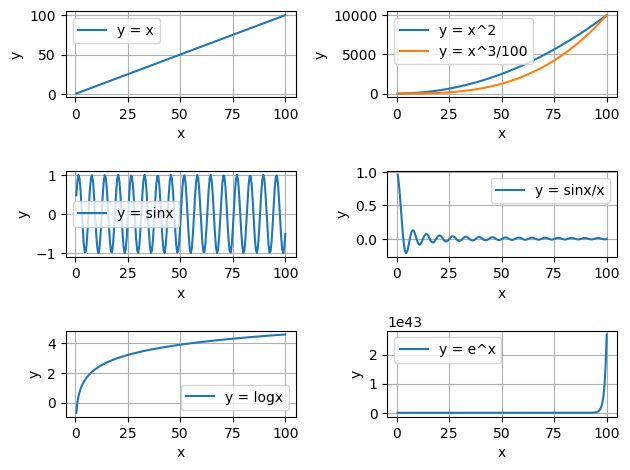

In [59]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.5,100.5,0.5)
def plot():
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.subplot(3,2,1)
plt.plot(x,x,label='y = x')
plot()
plt.subplot(3,2,2)
plt.plot(x,x**2,label='y = x^2')
plt.plot(x,(x**3)/100,label='y = x^3/100')
plot()
plt.subplot(3,2,3)
plt.plot(x,np.sin(x),label='y = sinx')
plot()
plt.subplot(3,2,4)
plt.plot(x,(np.sin(x))/x,label='y = sinx/x')
plot()
plt.subplot(3,2,5)
plt.plot(x,np.log(x),label='y = logx')
plot()
plt.subplot(3,2,6)
plt.plot(x,np.exp(x),label='y = e^x')
plot()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [83]:
import numpy as np
import pandas as pd
matrix=np.random.uniform(1,2,size=(20,5))
df=pd.DataFrame(matrix,columns=["a","b","c","d","e"])
column_with_highest_std=df.std().idxmax()
row_with_lowest_mean=df.mean(axis=1).idxmin()
print(f"Column with the highest standard deviation: {column_with_highest_std}")
print(f"Row with the lowest mean: {row_with_lowest_mean}")
print("\nDataFrame:\n")
df

Column with the highest standard deviation: c
Row with the lowest mean: 7

DataFrame:



,a,b,c,d,e
0,1.012195,1.376867,1.998437,1.539382,1.182289
1,1.433362,1.357666,1.903225,1.119883,1.258407
2,1.403212,1.764856,1.969616,1.030838,1.253204
3,1.559054,1.565582,1.668140,1.683541,1.504478
4,1.490097,1.722668,1.776711,1.494052,1.581302
5,1.918701,1.616878,1.896239,1.781629,1.166617
6,1.120202,1.947948,1.820408,1.185409,1.881422
7,1.052741,1.707049,1.054296,1.562899,1.079779
8,1.539953,1.467123,1.486238,1.948622,1.406007
9,1.476395,1.768267,1.432362,1.895844,1.647018


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [85]:
df['f']=df[['a','b','c','d','e']].sum(axis=1)
df['g']=df['f'].apply(lambda x: 'LT8' if x<8 else 'GT8')
lt8_count=df[df['g']=='LT8'].shape[0]
lt8_std=df[df['g']=='LT8']['f'].std()
gt8_std = df[df['g']=='GT8']['f'].std()
print("\nDataFrame:\n")
display(df)
lt8_count,lt8_std,gt8_std


DataFrame:



,a,b,c,d,e,f,g
0,1.012195,1.376867,1.998437,1.539382,1.182289,7.109170,LT8
1,1.433362,1.357666,1.903225,1.119883,1.258407,7.072542,LT8
2,1.403212,1.764856,1.969616,1.030838,1.253204,7.421726,LT8
3,1.559054,1.565582,1.668140,1.683541,1.504478,7.980795,LT8
4,1.490097,1.722668,1.776711,1.494052,1.581302,8.064830,GT8
5,1.918701,1.616878,1.896239,1.781629,1.166617,8.380064,GT8
6,1.120202,1.947948,1.820408,1.185409,1.881422,7.955389,LT8
7,1.052741,1.707049,1.054296,1.562899,1.079779,6.456765,LT8
8,1.539953,1.467123,1.486238,1.948622,1.406007,7.847943,LT8
9,1.476395,1.768267,1.432362,1.895844,1.647018,8.219886,GT8


(14, 0.5168101858687009, 0.5526898453439779)

12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy is a mechanism that allows arrays of different shapes to be used together in arithmetic operations. NumPy broadcasts the smaller dimensional array  across each row of higher dimensional array. 

In [101]:
A = np.random.random((2,3))
B = np.random.random((1,3))
C = A + B
print("Matrix A:")
print(A)
print("\nArray B:")
print(B)
print("\nResult of A + B (with broadcasting):")
print(C)

Matrix A:
[[0.52457448 0.15146349 0.95969099]
 [0.16365277 0.49376953 0.14761993]]

Array B:
[[0.35253629 0.12988189 0.69216887]]

Result of A + B (with broadcasting):
[[0.87711076 0.28134537 1.65185987]
 [0.51618906 0.62365142 0.8397888 ]]


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [158]:
def argmin(arr):
    min_idx=0
    for i in range(1,len(arr)):
        if arr[min_idx]>arr[i]:
            min_idx=i
    return min_idx
Array=np.random.random((5))
print(Array)
print(f"using argmin:{argmin(Array)}")
print(f"using numpy:{np.argmin(Array)}")

[0.82814262 0.31090989 0.47767774 0.08605485 0.66915413]
using argmin:3
using numpy:3
